In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import wrangle
from env import get_db_url

import pydataset
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [4]:
df = df.drop(['bathroomcnt', 'bedroomcnt'], axis = 1)

In [5]:
df.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,3633.0,296425.0,2005.0,6941.39,6037.0
6,1620.0,847770.0,2011.0,10244.94,6037.0
7,2077.0,646760.0,1926.0,7924.68,6037.0
11,1200.0,5328.0,1972.0,91.60,6037.0
14,171.0,6920.0,1973.0,255.17,6037.0


In [6]:
# data splitting
train, test = train_test_split(df, test_size=.2, random_state=198)


In [7]:
train.shape

(1712188, 5)

In [8]:
test.shape

(428047, 5)

### visualizations of un-scaled

<AxesSubplot:ylabel='Frequency'>

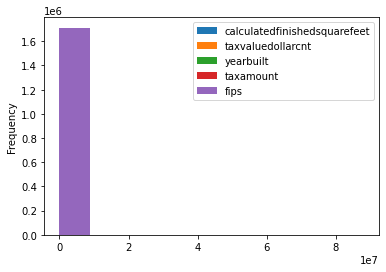

In [9]:
train.plot.hist()

<AxesSubplot:ylabel='Frequency'>

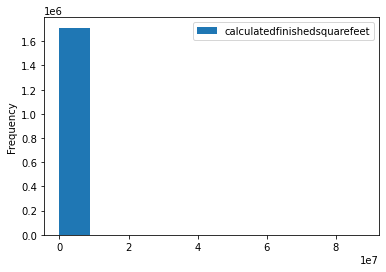

In [10]:
train.plot.hist(column=["calculatedfinishedsquarefeet"])

In [11]:
train_scaled = train.copy()

In [12]:
train_scaled.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1383522,1350.0,218743.0,1951.0,2723.20,6037.0
1899587,1376.0,319263.0,1930.0,4483.15,6037.0
962988,2425.0,645590.0,1954.0,9217.95,6037.0
778760,1124.0,204306.0,1931.0,2613.04,6037.0
128405,1695.0,524415.0,1986.0,6329.36,6059.0


In [13]:
train_scaled.shape

(1712188, 5)

#  1. visual comparisons scaled vs. unscaled

#### Min-Max

In [14]:
train_scaled_MM = train_scaled.copy()

In [15]:
cols = ['calculatedfinishedsquarefeet', 'yearbuilt', 'taxamount']
scaler_MM = MinMaxScaler()
train_scaled_MM[cols]=scaler_MM.fit_transform(train_scaled_MM[cols])

In [16]:
train_scaled_MM.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1383522,0.001416,218743.0,0.697674,0.002582,6037.0
1899587,0.001443,319263.0,0.600000,0.004255,6037.0
962988,0.002545,645590.0,0.711628,0.008756,6037.0
778760,0.001179,204306.0,0.604651,0.002478,6037.0
128405,0.001778,524415.0,0.860465,0.006010,6059.0


In [17]:
train.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1383522,1350.0,218743.0,1951.0,2723.20,6037.0
1899587,1376.0,319263.0,1930.0,4483.15,6037.0
962988,2425.0,645590.0,1954.0,9217.95,6037.0
778760,1124.0,204306.0,1931.0,2613.04,6037.0
128405,1695.0,524415.0,1986.0,6329.36,6059.0


(array([1.712187e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e+00, 9.525850e+04, 1.905160e+05, 2.857735e+05,
        3.810310e+05, 4.762885e+05, 5.715460e+05, 6.668035e+05,
        7.620610e+05, 8.573185e+05, 9.525760e+05]),
 <BarContainer object of 10 artists>)

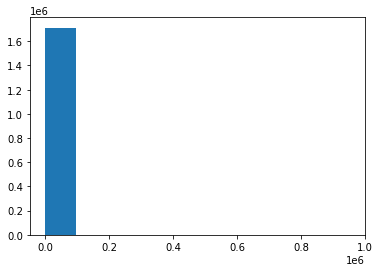

In [18]:
plt.hist(train.calculatedfinishedsquarefeet)

(array([1.712187e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

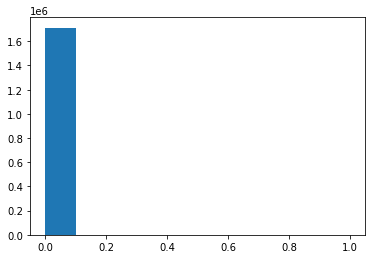

In [19]:
plt.hist(train_scaled_MM.calculatedfinishedsquarefeet)

Text(0.5, 1.0, 'Scaled')

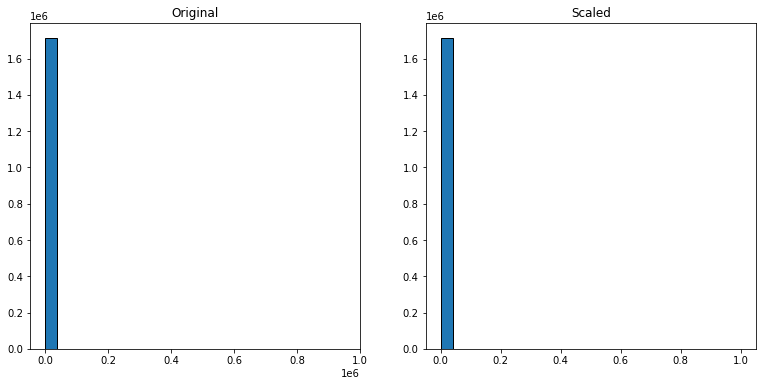

In [20]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_MM.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

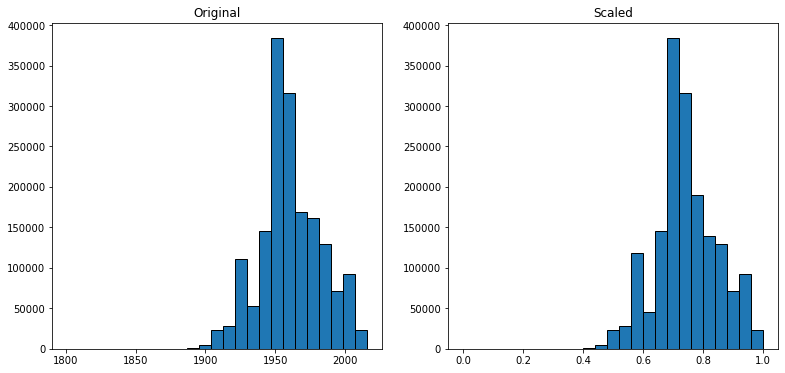

In [21]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.yearbuilt, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_MM.yearbuilt, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

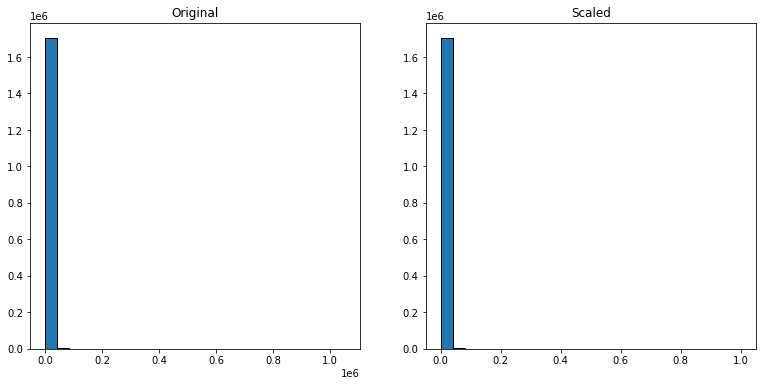

In [22]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_MM.taxamount, bins=25, ec='black')
plt.title('Scaled')

### scaler = sklearn.preprocessing.StandardScaler()


In [23]:
train_scaled_standard = train_scaled.copy()

In [24]:
scaler_standard = sklearn.preprocessing.StandardScaler()

In [25]:
train_scaled_standard[cols]=scaler_standard.fit_transform(train_scaled_standard[cols])

In [26]:
train_scaled_standard.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1383522,-0.423643,218743.0,-0.450326,-0.372688,6037.0
1899587,-0.402199,319263.0,-1.398165,-0.145997,6037.0
962988,0.463001,645590.0,-0.314920,0.463870,6037.0
778760,-0.610045,204306.0,-1.353030,-0.386877,6037.0
128405,-0.139092,524415.0,1.129405,0.091805,6059.0


Text(0.5, 1.0, 'Scaled')

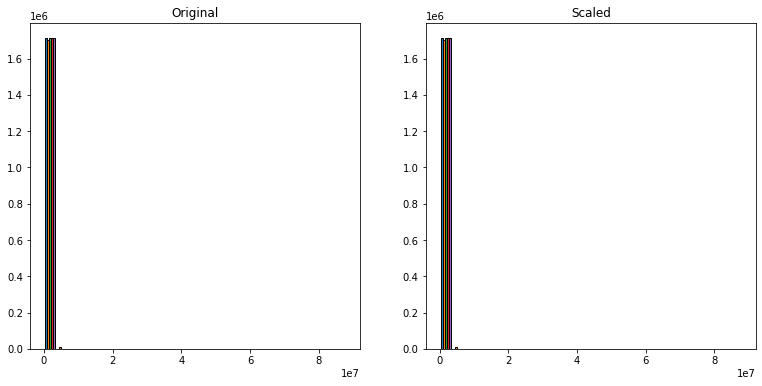

In [27]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_standard, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

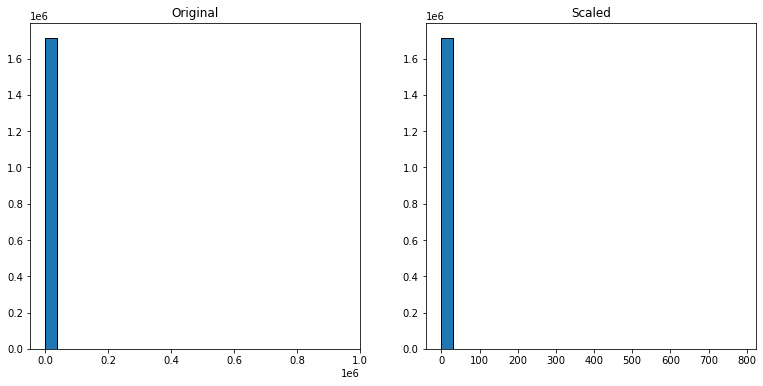

In [28]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_standard.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

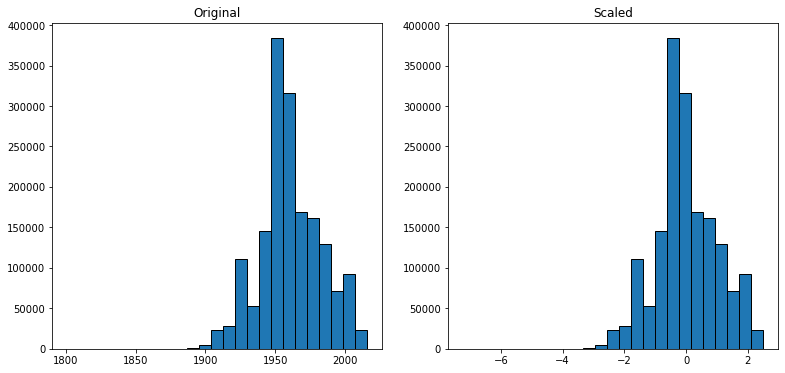

In [29]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.yearbuilt, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_standard.yearbuilt, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

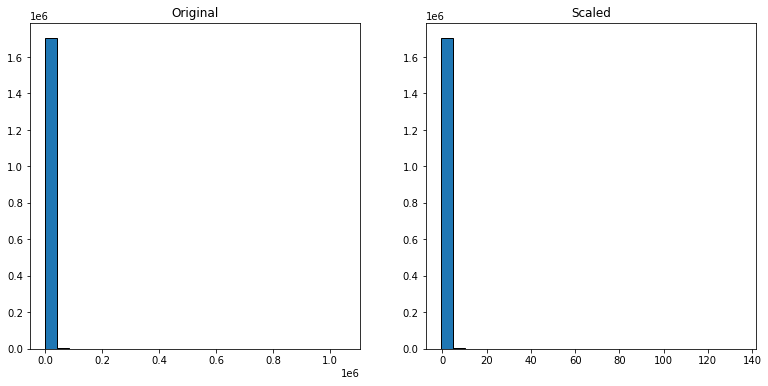

In [30]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_standard.taxamount, bins=25, ec='black')
plt.title('Scaled')

### scaler = robust

In [31]:
train_scaled_robust = train_scaled.copy()

In [32]:
scaler_robust = sklearn.preprocessing.RobustScaler()

In [33]:
train_scaled_robust[cols]=scaler_robust.fit_transform(train_scaled_robust[cols])

In [34]:
train_scaled_robust.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1383522,-0.288118,218743.0,-0.259259,-0.358645,6037.0
1899587,-0.260778,319263.0,-1.037037,0.095710,6037.0
962988,0.842271,645590.0,-0.148148,1.318063,6037.0
778760,-0.525762,204306.0,-1.000000,-0.387084,6037.0
128405,0.074658,524415.0,1.037037,0.572335,6059.0


Text(0.5, 1.0, 'Scaled')

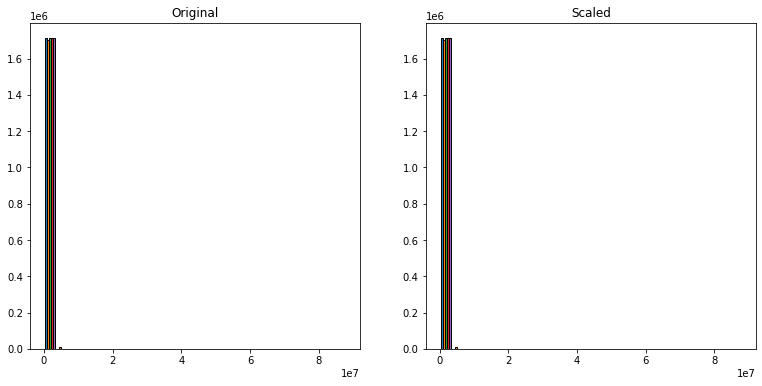

In [35]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_robust, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

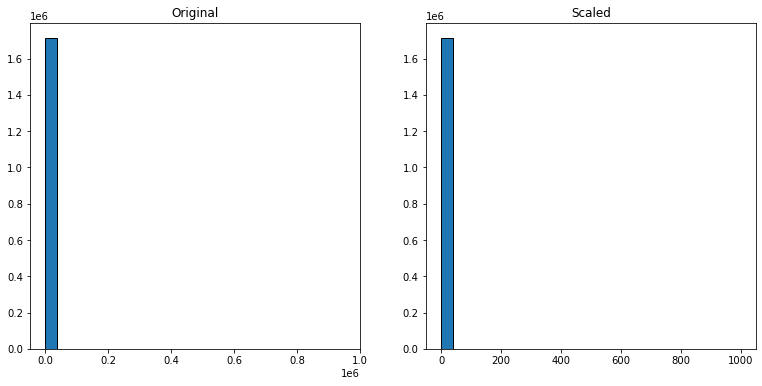

In [36]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_robust.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

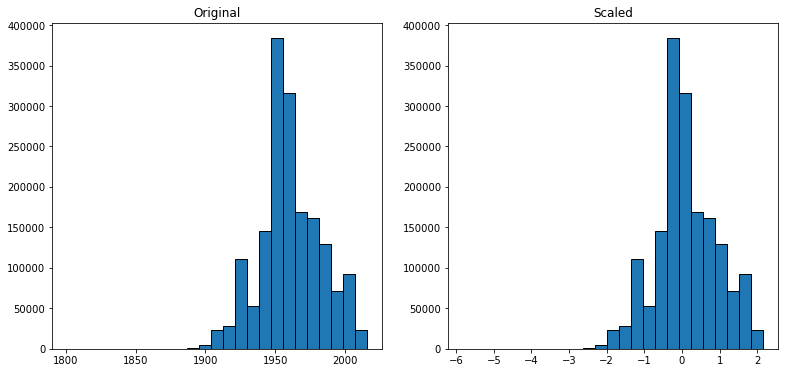

In [37]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.yearbuilt, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_robust.yearbuilt, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

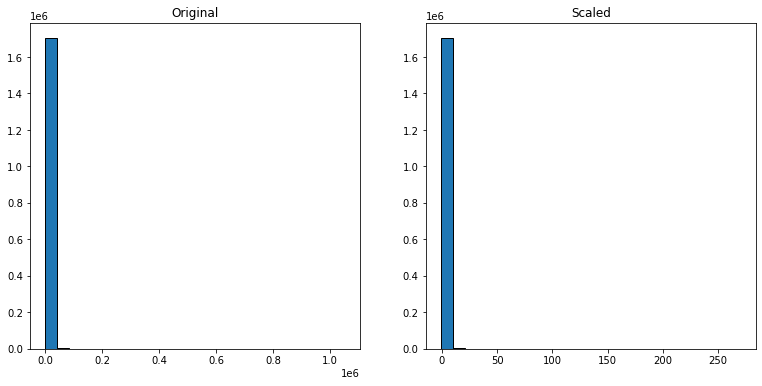

In [38]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_robust.taxamount, bins=25, ec='black')
plt.title('Scaled')

## other means of visualizations

<AxesSubplot:xlabel='yearbuilt'>

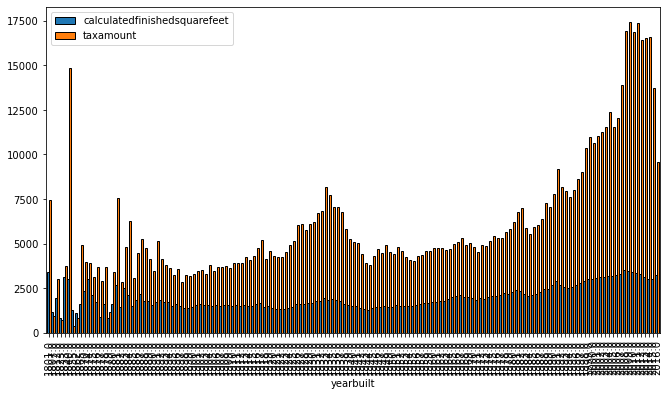

In [39]:

df[['calculatedfinishedsquarefeet', 'yearbuilt', 'taxamount']].groupby('yearbuilt').mean().plot.bar(figsize=(11, 6), ec='black', width=.95)



# Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


#### inverse for robust

In [40]:
train_scaled_robust.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1383522,-0.288118,218743.0,-0.259259,-0.358645,6037.0
1899587,-0.260778,319263.0,-1.037037,0.095710,6037.0
962988,0.842271,645590.0,-0.148148,1.318063,6037.0
778760,-0.525762,204306.0,-1.000000,-0.387084,6037.0
128405,0.074658,524415.0,1.037037,0.572335,6059.0


In [41]:
train_scaled_robust_inverse = train_scaled_robust.scaler_robust.inverse_transform(train_scaled_robust)

AttributeError: 'DataFrame' object has no attribute 'scaler_robust'

In [ ]:
scaler_robust

In [ ]:
train_scaled_robust.head()

In [ ]:
scaler_robust.inverse_transform(scaled_robust_sqft)

In [ ]:
scaled_robust_sqft = train_scaled_robust[['calculatedfinishedsquarefeet']]

#### inverse for minmax